# Final project

In [90]:
#导入所需包
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, TheilSenRegressor, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [129]:
#导入数据并进行特征选择
df = pandas.read_csv('Original Data/melb_data.csv')
areas = df[['Suburb']]

#feature = df[['Rooms','Bedroom2','Bathroom','Distance','Landsize','BuildingArea','YearBuilt']]
feature = df[['Rooms','Bedroom2','Bathroom','Distance','Landsize','BuildingArea','YearBuilt', 'Car', 'Lattitude', 'Longtitude']]
feature.fillna(feature.mean(), inplace=True)

price = df[['Price']]
price.fillna(price.mean(), inplace=True)

/Users/winton/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [130]:
#本次项目主要分为以下几个部分：
# (1)数据分析可视化部分
# (2)数据预处理部分
# (3)模型训练和预测
# (4)结果分析
# (5)总结

In [131]:
#1.数据分析可视化部分

In [132]:
#查看相关数据
min_price = np.min(price)
max_price = np.max(price)
mean_price = np.mean(price)
median_price = np.median(price)
std_price = np.std(price)
print (f"Statistics for Boston housing dataset:{min_price}\n")
print (f"min_price: {min_price}")
print (f"max_price: {max_price}")
print (f"mean_price :{mean_price}")
print (f"median_price:{median_price}")
print (f"std_price: {std_price}")

Statistics for Boston housing dataset:Price    85000
dtype: int64

min_price: Price    85000
dtype: int64
max_price: Price    9000000
dtype: int64
mean_price :Price    1.056697e+06
dtype: float64
median_price:880000.0
std_price: Price    641904.219156
dtype: float64


In [133]:
#2.数据预处理部分
def detect_outliers(df,n,features):

    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # multiple_outliers = list( k for k, v in outlier_indices.items() if v > n)
        outlier_indices.extend(outlier_list_col)
        x = np.array(outlier_list_col)
        print(len(x))
    return outlier_list_col
Outliers_to_drop = detect_outliers(df, 2, ['Rooms'])
df = df.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
Outliers_to_drop = detect_outliers(df, 2, ['Rooms'])


894
0


In [134]:
#3.模型训练和预测

X = np.array(feature)
y = np.array(price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, shuffle=True)

In [135]:
# 备用代码
# model = LinearRegression()
# model.fit(X_train,y_train)

# yhat_1 = model.predict(X_test)
# score_1 = r2_score(y_test, yhat_1)
# print('Model score is ', score_1)
# print ('The mean squared error is: ', mean_squared_error(y_test, yhat_1))


R2:  -2.433007139897417
r2_score =  [0.23768389 0.47740822 0.51818112 0.45983063 0.50169354]
r2_score_average =  0.4389594801247398


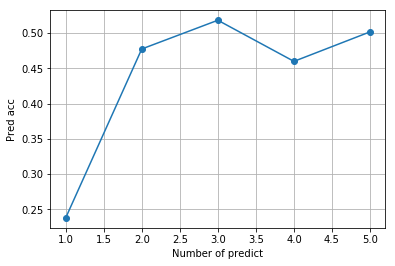

In [137]:
#模型一：线性回归模型

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

yhat = LinearRegression_model.predict(X_test)
R2 = 1 - np.mean((y_test-yhat)**2)/(np.std(y_test)**2)
print("R2: ", R2)

kf = KFold(n_splits=5, shuffle=True)
score_ndarray = cross_val_score(LinearRegression_model, X_test, y_test.ravel(), cv=kf)

print('r2_score = ', score_ndarray)
print('r2_score_average = ', score_ndarray.mean())

#画图
#plt.scatter(np.arange(1, 6), score_ndarray)
plt.xlabel('Number of predict')
plt.ylabel('Pred acc')

#ymin = np.min(y_test)
#ymax = np.max(y_test)
plt.plot(np.arange(1, 6), score_ndarray, "o-")
plt.grid()
plt.show()

In [138]:
#模型二：广义线性回归模型
#model = TheilSenRegressor()
#model.fit(X_train, y_train)

#TheilSenRegressor_model = TheilSenRegressor()
#kf = KFold(n_splits=5, shuffle=True)
#score_ndarray = cross_val_score(TheilSenRegressor_model, X, y.ravel(), cv=kf)
#print('r2_score = ', score_ndarray)
#print('r2_score_average = ', score_ndarray.mean())

# yhat_2 = model.predict(X_test)
# score_2 = r2_score(y_test, yhat_2)
# print('Model score is ', score_2)
# print ('The mean squared error is: ', mean_squared_error(y_test, yhat_2))

# #画图
# plt.scatter(y_test, yhat_2)
# plt.xlabel('Actual lpsa')
# plt.ylabel('Pred lpsa')

# ymin = np.min(y_test)
# ymax = np.max(y_test)
# plt.plot([ymin, ymax], [ymin, ymax], 'r-', linewidth=3)
# plt.grid()
# plt.show()

In [143]:
#模型三：梯度增强回归模型

GradientBoostingRegressor_model = GradientBoostingRegressor(n_estimators = 400, min_samples_split = 2,
         learning_rate = 0.1, loss = 'ls')
GradientBoostingRegressor_model.fit(X_train, y_train)

kf = KFold(n_splits=5, shuffle=True)
score_ndarray = cross_val_score(GradientBoostingRegressor_model, X_test, y_test.ravel(), cv=kf)
print('r2_score = ', score_ndarray)
print('r2_score_average = ', score_ndarray.mean())

# yhat_3 = model.predict(X_test)
# score_3 = r2_score(y_test, yhat_3)
# print('Model score is ', score_3)
# print ('The mean squared error is: ', mean_squared_error(y_test, yhat_3))

#画图
# plt.scatter(y_test, yhat_3)
# plt.xlabel('Actual lpsa')
# plt.ylabel('Pred lpsa')

# ymin = np.min(y_test)
# ymax = np.max(y_test)
# plt.plot([ymin, ymax], [ymin, ymax], 'r-', linewidth=3)
# plt.grid()
# plt.show()

/Users/winton/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_score =  [0.69574719 0.65712321 0.69778684 0.70298437 0.70435548]
r2_score_average =  0.6915994181593804


In [140]:
#模型四：决策树回归模型
#使用决策树回归模型做回归预测，并使用交叉验证查看模型得分。
#调用sklearn.tree库的DecisionTreeRegressor方法实例化模型对象。
#调用sklearn.model_selection库的KFold方法实例化交叉验证对象。
#调用sklearn.model_selection库的cross_val_score方法做交叉验证。

randomForest_model = RandomForestRegressor()
randomForest_model.fit(X_train, y_train)

kf = KFold(n_splits=5, shuffle=True)
score_ndarray = cross_val_score(randomForest_model, X_test, y_test.ravel(), cv=kf)
print('r2_score = ', score_ndarray)
print('r2_score_average = ', score_ndarray.mean())

/Users/winton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/winton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


r2_score =  [0.69021799 0.63505276 0.68753979 0.63967966 0.64153495]
r2_score_average =  0.6588050275544418


In [141]:
#模型五：随机森林回归模型
#使用随机森林回归模型做回归预测，并使用交叉验证查看模型得分。
#调用sklearn.ensemble库的RandonForestRegressor方法实例化模型对象。
#调用sklearn.model_selection库的KFold方法实例化交叉验证对象。
#调用sklearn.model_selection库的cross_val_score方法做交叉验证。

randomForest_model = RandomForestRegressor()
randomForest_model.fit(X_train, y_train)

kf = KFold(n_splits=5, shuffle=True)
score_ndarray = cross_val_score(randomForest_model, X_test, y_test.ravel(), cv=kf)
print('r2_score = ', score_ndarray)
print('r2_score_average = ', score_ndarray.mean())

/Users/winton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/winton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


r2_score =  [0.66164697 0.68152744 0.63300895 0.64248558 0.67655725]
r2_score_average =  0.6590452367159183


In [142]:
#模型六：极限🌲回归模型
#使用极限🌲回归模型做回归预测，并使用交叉验证查看模型得分。
#调用sklearn.ensemble库的ExtraTreesRegressor方法实例化模型对象。
#调用sklearn.model_selection库的KFold方法实例化交叉验证对象。
#调用sklearn.model_selection库的cross_val_score方法做交叉验证。

ExtraTrees_model = ExtraTreesRegressor()
ExtraTrees_model.fit(X_train, y_train)

kf = KFold(n_splits=5, shuffle=True)
score_ndarray = cross_val_score(ExtraTrees_model, X_test, y_test.ravel(), cv=kf)
print('r2_score = ', score_ndarray)
print('r2_score_average = ', score_ndarray.mean())

/Users/winton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/winton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


r2_score =  [0.69874277 0.6429133  0.66457062 0.6600033  0.56905607]
r2_score_average =  0.647057213412411
